## TARC 2025 Rocket Simulator

In [76]:
!pip install rocketpy
!curl -o NACA0012-radians.txt https://raw.githubusercontent.com/RocketPy-Team/RocketPy/master/data/airfoils/NACA0012-radians.txt
!curl -o Cesaroni_M1670.eng https://raw.githubusercontent.com/RocketPy-Team/RocketPy/master/data/motors/cesaroni/Cesaroni_M1670.eng
!curl -o powerOffDragCurve.csv https://raw.githubusercontent.com/RocketPy-Team/RocketPy/master/data/rockets/calisto/powerOffDragCurve.csv
!curl -o powerOnDragCurve.csv https://raw.githubusercontent.com/RocketPy-Team/RocketPy/master/data/rockets/calisto/powerOnDragCurve.csv
!curl -o AeroTech_F39T.eng https://path.to/AeroTech_F39T.eng

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1052  100  1052    0     0   5393      0 --:--:-- --:--:-- --:--:--  5367   0 --:--:-- --:--:-- --:--:--  5394
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   163  100   163    0     0    899      0 --:--:-- --:--:-- --:--:--   895
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3362  100  3362    0     0  16993      0 --:--:-- --:--:-- --:--:-- 17065
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3362  100  3362    0     0  17657      0 --:--:-- --:--:-- --:--:-- 17694
  % Total    % 

In [77]:
from rocketpy import Environment, SolidMotor, Rocket, Flight

In [78]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [79]:
env = Environment(latitude=47.7062, longitude=-122.1395, elevation=15)

In [80]:
import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
    (tomorrow.year, tomorrow.month, tomorrow.day, 12)
)  # Hour given in UTC time


Gravity Details

Acceleration of gravity at surface level:    9.8083 m/s²
Acceleration of gravity at  79.476 km (ASL): 9.5680 m/s²


Launch Site Details

Launch Date: 2025-03-24 12:00:00 UTC
Launch Site Latitude: 47.70620°
Launch Site Longitude: -122.13950°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 114493.42 W    5296452.49 N
Launch Site UTM zone: 11T
Launch Site Surface Elevation: 108.4 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 79.476 km
Forecast Time Period: from 2025-03-23 18:00:00 to 2025-04-08 18:00:00 utc
Forecast Hour Interval: 3 hrs
Forecast Latitude Range: From -90.0° to 90.0°
Forecast Longitude Range: From 0.0° to 359.75°

Surface Atmospheric Conditions

Surface Wind Speed: 6.84 m/s
Surface Wind Direction: 210.39°
Surface Wind Heading: 30.39°
Surface Pressure: 1000.00 hPa
Surface Temperature: 283.93 K
Surface Air Density: 1.227 kg/m³
Surface Speed of Sound: 337.79 m/s


Earth Model Details

Earth Radius at Launch 

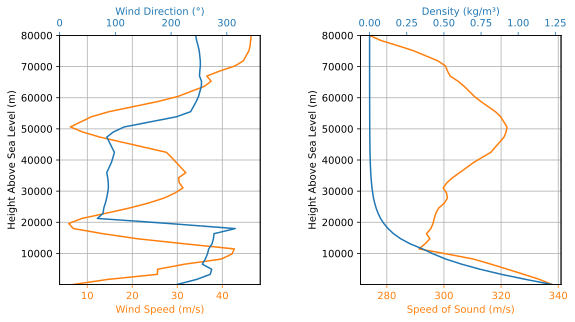

In [81]:
env.set_atmospheric_model(type="Forecast", file="GFS")
env.info()

In [82]:
Casing = SolidMotor(
    thrust_source="AeroTech_F39T.eng",
    dry_mass=0.184,
    dry_inertia=(1.37e-5, 4.94e-5, 4.94e-5),
    nozzle_radius=0.012,
    grain_number=1,
    grain_density=1700,
    grain_outer_radius=0.012,
    grain_initial_inner_radius=0.004,
    grain_initial_height=0.076,
    grain_separation=0,
    grains_center_of_mass_position=0.038,
    center_of_dry_mass_position=0.0508,
    nozzle_position=0.0,
    burn_time=1.33,
    throat_radius=0.005,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)


Nozzle Details
Nozzle Radius: 0.012 m
Nozzle Throat Radius: 0.005 m

Grain Details
Number of Grains: 1
Grain Spacing: 0 m
Grain Density: 1700 kg/m3
Grain Outer Radius: 0.012 m
Grain Inner Radius: 0.004 m
Grain Height: 0.076 m
Grain Volume: 0.000 m3
Grain Mass: 0.052 kg

Motor Details
Total Burning Time: 1.33 s
Total Propellant Mass: 0.052 kg
Structural Mass Ratio: 0.780
Average Propellant Exhaust Velocity: 955.808 m/s
Average Thrust: 37.337 N
Maximum Thrust: 59.47 N at 0.079 s after ignition.
Total Impulse: 49.658 Ns



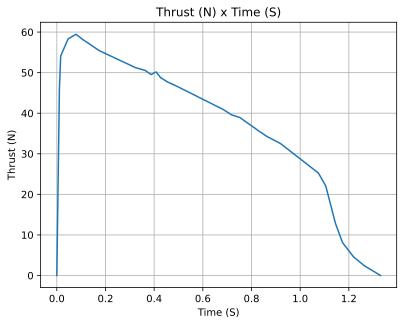

In [83]:
Casing.info()

In [84]:
calisto = Rocket(
    radius=127 / 2000,
    mass=4.0,
    inertia=(0.5, 0.5, 0.01),
    power_off_drag="powerOffDragCurve.csv",
    power_on_drag="powerOnDragCurve.csv",
    center_of_mass_without_motor=0,
    coordinate_system_orientation="tail_to_nose",
)


rail_buttons = calisto.set_rail_buttons(
    upper_button_position=0.0818,
    lower_button_position=-0.618,
    angular_position=45,
)

In [85]:
calisto.add_motor(Casing, position=-1.255)

In [86]:
nose_cone = calisto.add_nose(length=0.55829, kind="vonKarman", position=1.278)

fin_set = calisto.add_trapezoidal_fins(
    n=4,
    root_chord=0.120,
    tip_chord=0.060,
    span=0.110,
    position=-1.04956,
    cant_angle=0.5,
    airfoil=("NACA0012-radians.txt", "radians"),
)

tail = calisto.add_tail(
    top_radius=0.0635, bottom_radius=0.0435, length=0.060, position=-1.194656
)


Inertia Details

Rocket Mass: 4.000 kg (without motor)
Rocket Dry Mass: 4.184 kg (with unloaded motor)
Rocket Loaded Mass: 4.236 kg
Rocket Structural Mass Ratio: 0.988
Rocket Inertia (with unloaded motor) 11: 0.755 kg*m2
Rocket Inertia (with unloaded motor) 22: 0.755 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.010 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.0635 m
Rocket Frontal Area: 0.012668 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.053 m
Rocket Center of Dry Mass - Nozzle Exit: 1.202 m
Rocket Center of Dry Mass - Center of Propellant Mass: 1.164 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.014 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 6.280/rad
Tail Lift Coefficient Deriv

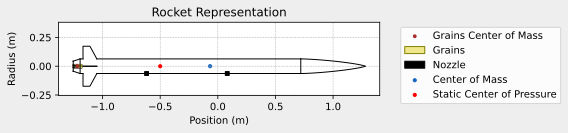


Mass Plots
----------------------------------------


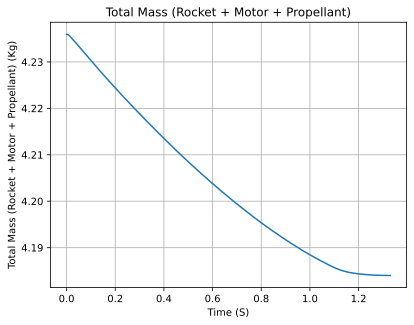

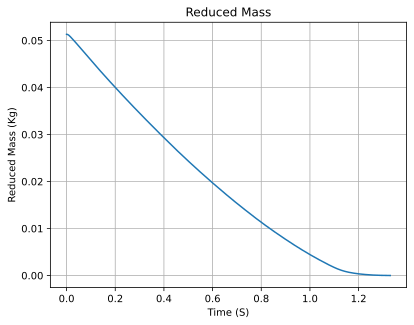


Aerodynamics Plots
----------------------------------------
Drag Plots
--------------------


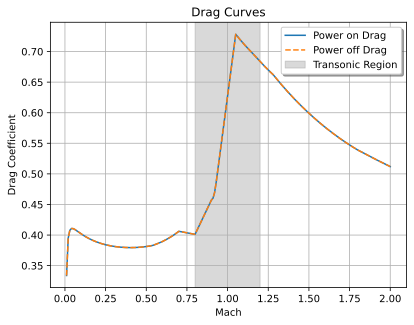


Stability Plots
--------------------


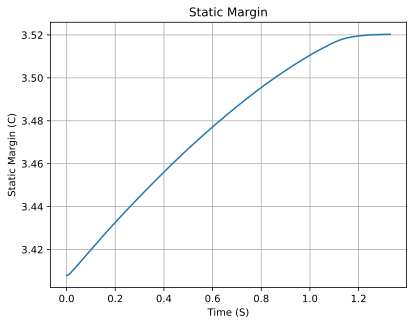

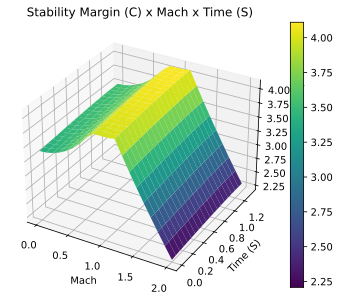


Thrust-to-Weight Plot
----------------------------------------


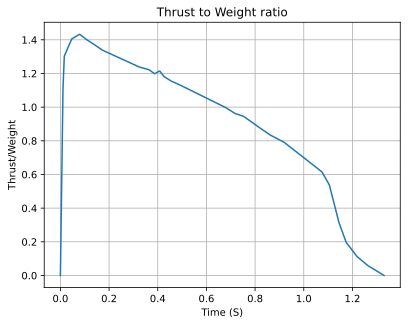

In [87]:
calisto.all_info()

In [88]:
Main = calisto.add_parachute(
    "Main",
    cd_s=10.0,
    trigger=800,
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

Drogue = calisto.add_parachute(
    "Drogue",
    cd_s=1.0,
    trigger="apogee",
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

In [89]:
test_flight = Flight(
    rocket=calisto, environment=env, rail_length=1.828, inclination=85, heading=0
)


Initial Conditions

Initial time: 0.000 s
Position - x: 0.00 m | y: 0.00 m | z: 108.40 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: 0.923 | e1: -0.040 | e2: 0.017 | e3: 0.382
Euler Angles - Spin φ : 45.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s | ω3: 0.00 rad/s
Initial Stability Margin: 3.408 c


Surface Wind Conditions

Frontal Surface Wind Speed: 5.90 m/s
Lateral Surface Wind Speed: -3.46 m/s


Launch Rail

Launch Rail Length: 1.828 m
Launch Rail Inclination: 85.00°
Launch Rail Heading: 0.00°


Rail Departure State

Rail Departure Time: 0.574 s
Rail Departure Velocity: 1.430 m/s
Rail Departure Stability Margin: 3.475 c
Rail Departure Angle of Attack: 82.349°
Rail Departure Thrust-Weight Ratio: 1.073
Rail Departure Reynolds Number: 6.062e+04


Burn out State

Burn out time: 1.330 s
Altitude at burn out: 109.496 m (ASL) | 1.093 m (AGL)
Rocket speed at burn out: 1.372 m/s
Freestream velocity 

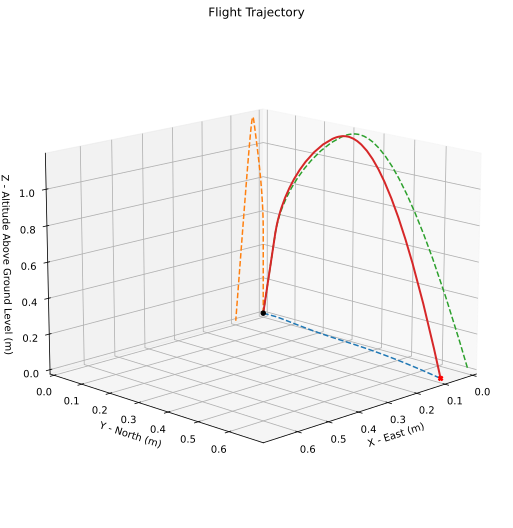



Trajectory Kinematic Plots



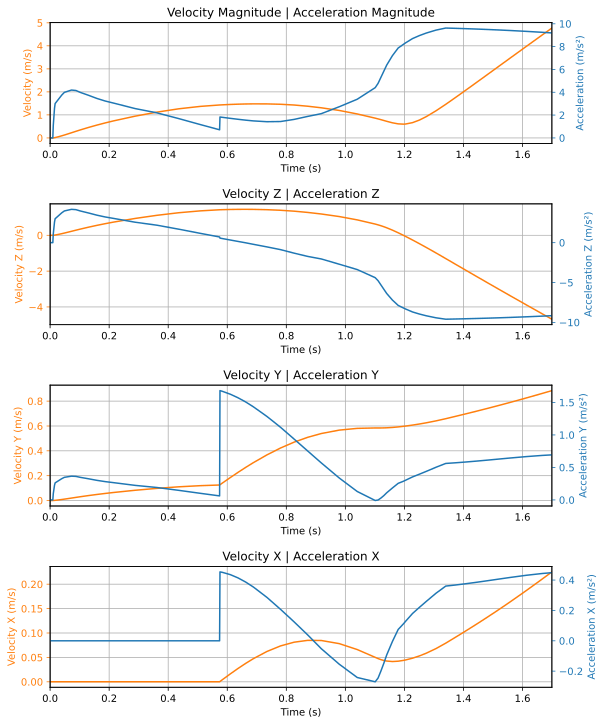



Angular Position Plots



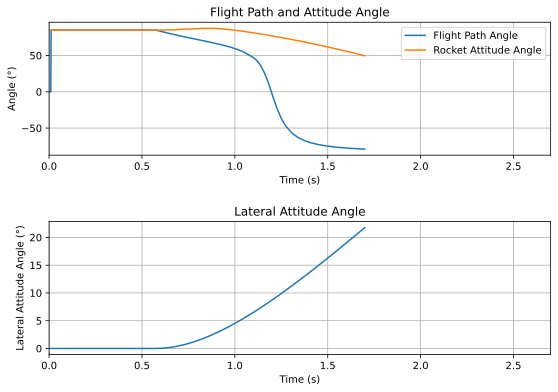



Path, Attitude and Lateral Attitude Angle plots



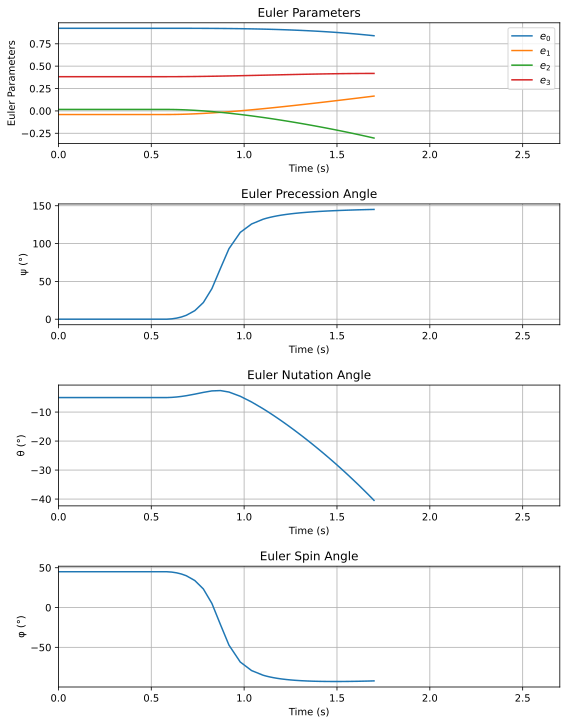



Trajectory Angular Velocity and Acceleration Plots



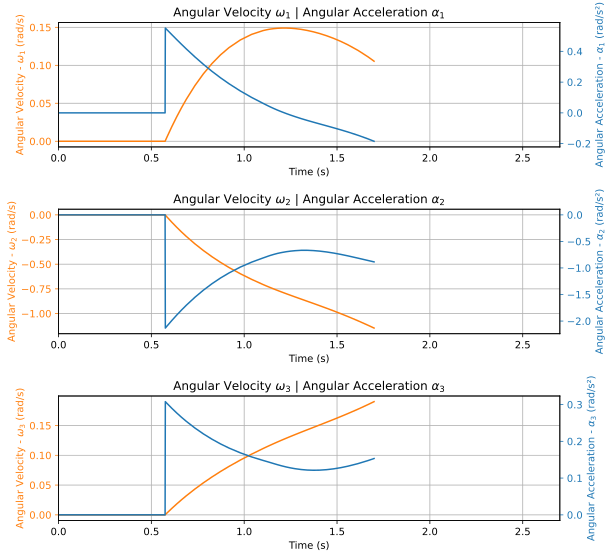



Aerodynamic Forces Plots



IndexError: index 0 is out of bounds for axis 0 with size 0

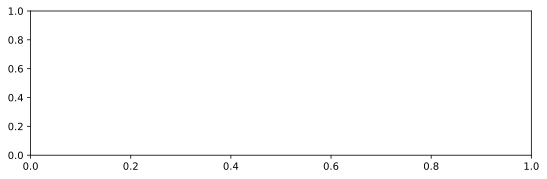

In [91]:
test_flight.all_info()